In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')
import sys
import torch
import cProfile

sys.path.append("..")

from pepsflow.iPEPS_trainer import iPEPSTrainer
from pepsflow.models.observables import Observables

lambda_values = [lam for lam in np.arange(0.1, 4, 0.25)]

In [2]:
with cProfile.Profile() as pr:
    chi=8
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False)
    trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 1, max_iter=10)
    trainer.save_data(fn = f"random_new/chi{chi}")

pr.print_stats(sort="cumtime")

100%|██████████| 16/16 [00:42<00:00,  2.68s/it]


Data saved to data\random_new/chi8.pth
         2188012 function calls (2170623 primitive calls) in 42.887 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       88    0.002    0.000   41.679    0.474 optimizer.py:464(wrapper)
   891/88    0.008    0.000   41.667    0.473 _contextlib.py:113(decorate_context)
       88    0.285    0.003   41.664    0.473 lbfgs.py:294(step)
      803    0.006    0.000   41.049    0.051 iPEPS_trainer.py:114(train)
      798    0.005    0.000   21.944    0.027 _tensor.py:465(backward)
      798    0.008    0.000   21.938    0.027 __init__.py:183(backward)
      798    0.006    0.000   21.911    0.027 graph.py:764(_engine_run_backward)
      798   21.903    0.027   21.903    0.027 {method 'run_backward' of 'torch._C._EngineBase' objects}
      803    0.070    0.000   18.770    0.023 iPEPS.py:44(forward)
      803    0.314    0.000   16.890    0.021 CTM_alg.py:39(exe)
74467/73669    0.667    0.

In [3]:
pr.print_stats(sort="cumtime")

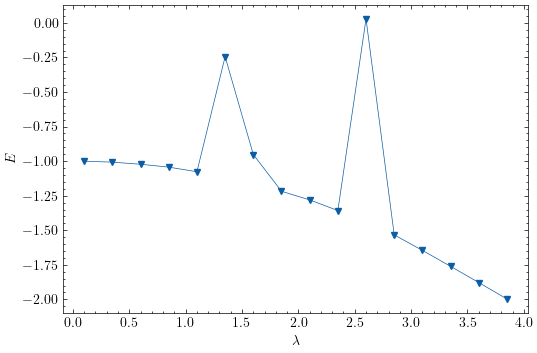

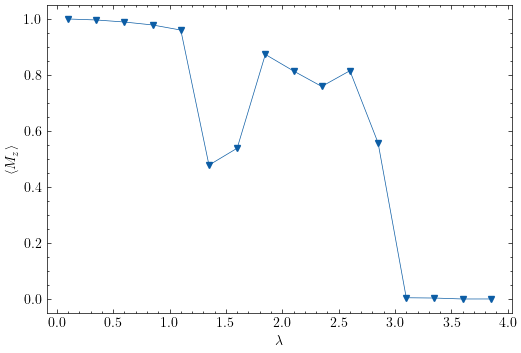

In [9]:
data = torch.load("data/random_new/chi8.pth", weights_only=False)
lamda_values = data.keys()
Mz, energies = [], []
for lam in lambda_values:
    E, C, T = data[lam].forward()
    A = data[lam].params[data[lam].map]
    energies.append(E.detach().cpu().numpy())
    Mz.append(abs(Observables.M(A, C, T)[2].detach().cpu().numpy()))

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, energies, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(lambda_values, Mz, 'v-', markersize=4, linewidth=0.5)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\langle M_z \rangle$")
plt.show()

In [7]:
chi_values = [8, 16]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False, data_fn = "data/random_new/chi4.pth")
    trainer.exe(lambda_values, epochs=5, use_prev=False, runs = 1, max_iter=5,lr=0.01)
    trainer.save_data(fn = f"random_new/chi{chi}")

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


Data saved to data\random_new/chi8.pth


100%|██████████| 16/16 [00:25<00:00,  1.62s/it]

Data saved to data\random_new/chi16.pth
